<a href="https://colab.research.google.com/github/vi21g/clustering/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

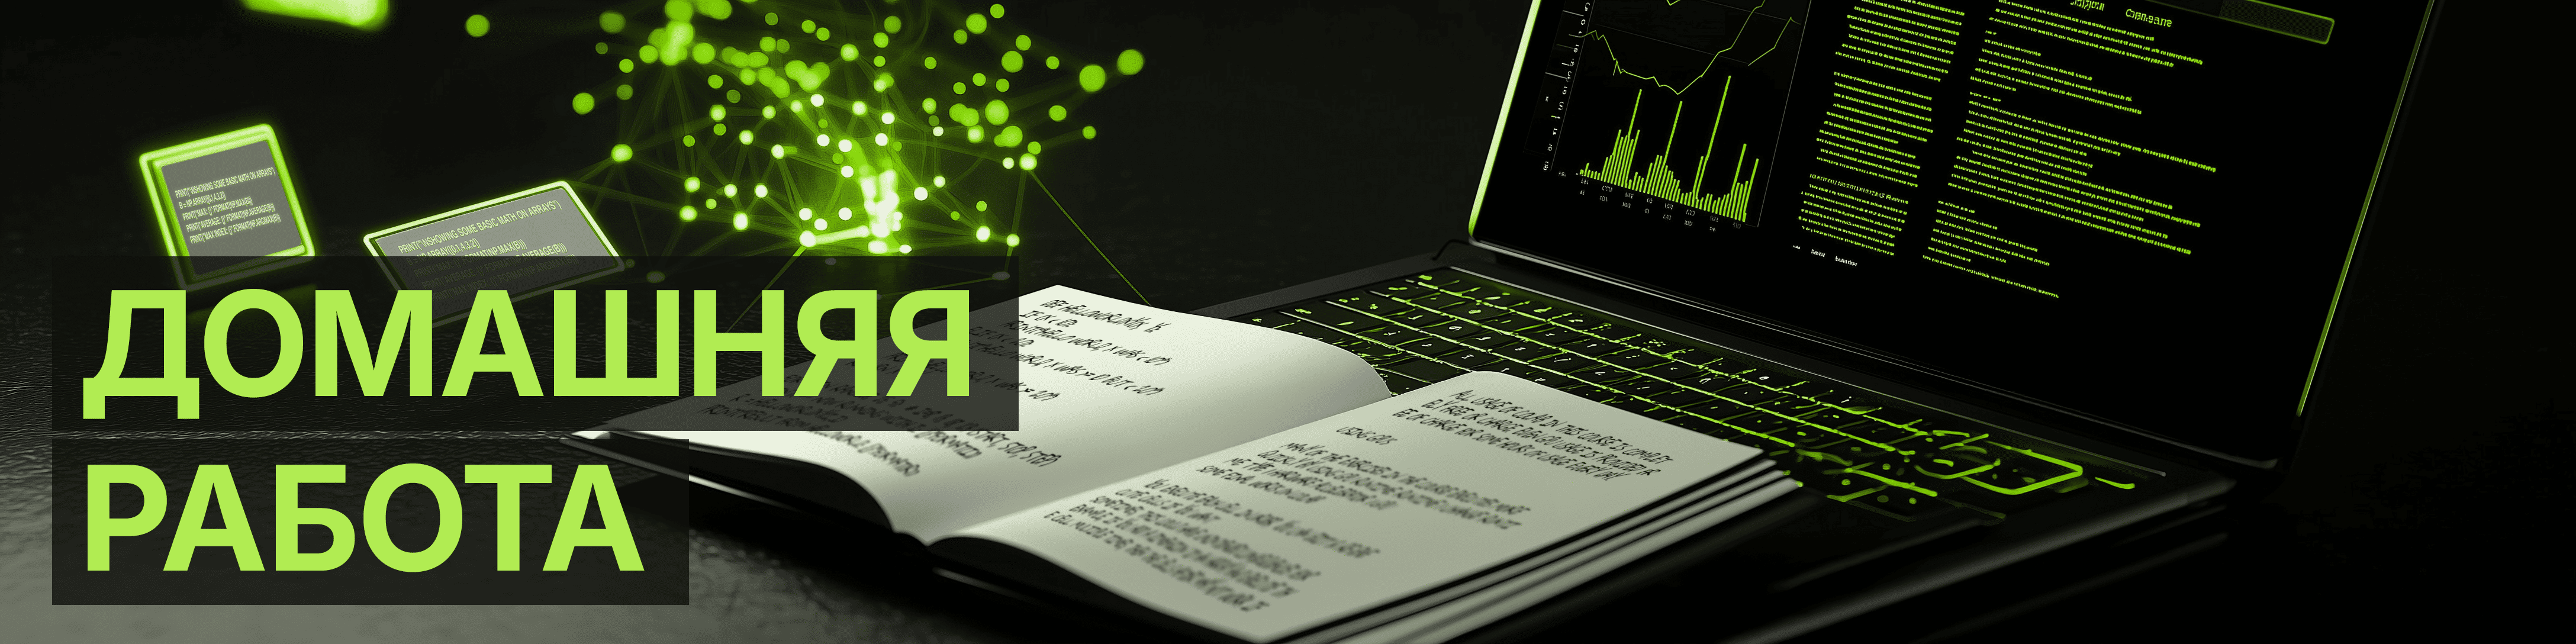

**Навигация по уроку**
1. [Кластеризация данных](https://colab.research.google.com/drive/1pGvEsnKLNQVMsjrN_bkHI_BnFCvPYLlH)
2. [Анализ кластеров](https://colab.research.google.com/drive/12BFMX7B01S-2CvTAcxbWXGvZ5ZAViQ1n)
3. [K-means кластеризация. Метрики и выбор числа кластеров](https://colab.research.google.com/drive/1Iz0nRUTCwNPleRxy1QHNEwTmeEntq2G0)
4. [Сегментация клиентов и текстовых данных](https://colab.research.google.com/drive/1Um2Kwi7CxcWO-s4YPRi837xt9OaJStI9)
5. Домашняя работа

# Mall_Customers.csv

## imports

In [ ]:
# Работа с данными
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Машинное обучение
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Глубокое обучение
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

## dataset

In [ ]:
!wget 'https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv'

--2025-04-13 17:30:24--  https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/csv]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-13 17:30:25 (1.01 GB/s) - ‘Mall_Customers.csv’ saved [3981/3981]



In [ ]:
df = pd.read_csv('Mall_Customers.csv')

print(df.info())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_encoded  
0               1  
1               1  
2               0  
3               0  
4               0  


In [ ]:
features = df.drop(['CustomerID', 'Gender'], axis=1)
print(features.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_encoded
0   19                  15                      39               1
1   21                  15                      81               1
2   20                  16                       6               0
3   23                  16                      77               0
4   31                  17                      40               0


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_encoded
0 -1.424569           -1.738999               -0.434801        1.128152
1 -1.281035           -1.738999                1.195704        1.128152
2 -1.352802           -1.700830               -1.715913       -0.886405
3 -1.137502           -1.700830                1.040418       -0.886405
4 -0.563369           -1.662660               -0.395980       -0.886405


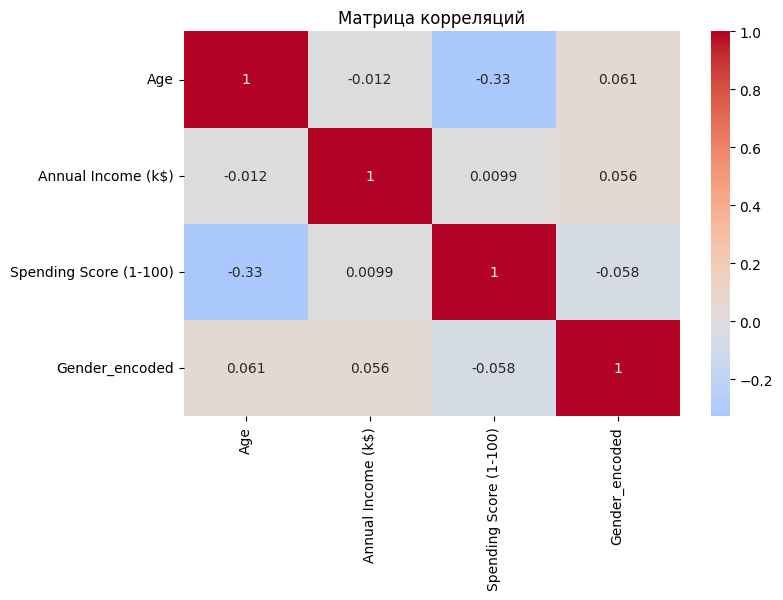

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

## Выбор количества кластеров

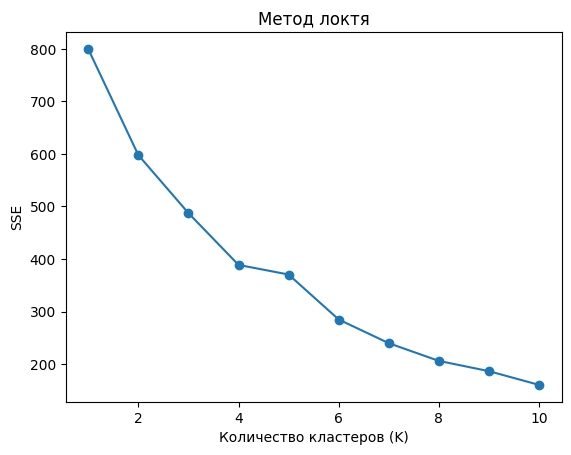

In [ ]:
# Список для хранения SSE для каждого K
sse = []

# Пробуем разные значения K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('SSE')
plt.title('Метод локтя')
plt.show()

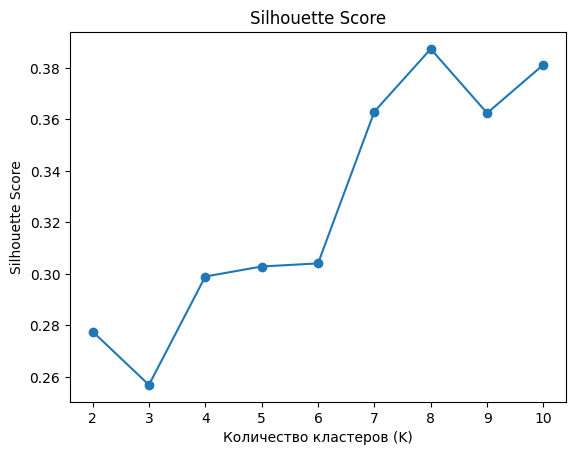

In [ ]:
# Список для хранения Silhouette Scores для каждого K
silhouette_scores = []

# Пробуем разные значения K
for k in range(2, 11):  # Silhouette Score требует как минимум 2 кластера
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

# Построение графика
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
NUM_CLUSTERS = 8

## Сегментация с различным random_state

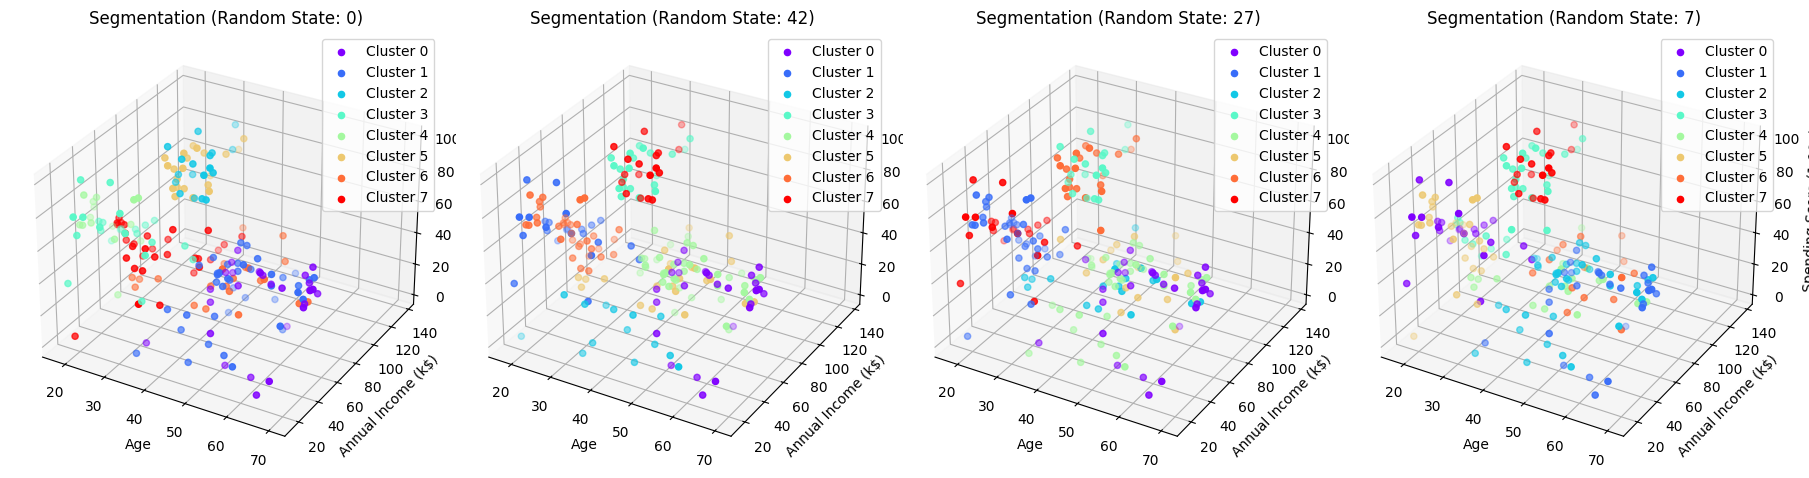

In [ ]:
RANDOM_STATES = [0, 42, 27, 7]

# Создаем радужную цветовую палитру
colors = plt.cm.rainbow(np.linspace(0, 1, NUM_CLUSTERS))

# Создаем фигуру с несколькими subplots
fig = plt.figure(figsize=(18, 6))

for i, random_state in enumerate(RANDOM_STATES, 1):
    # Применяем KMeans с текущим random_state
    kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=random_state)
    df['Cluster'] = kmeans.fit_predict(scaled_df)

    # Добавляем subplot для текущего random_state
    ax = fig.add_subplot(1, 4, i, projection='3d')

    # Визуализируем кластеры с радужными цветами
    for cluster in range(NUM_CLUSTERS):
        cluster_data = df[df['Cluster'] == cluster]
        ax.scatter(cluster_data['Age'],
                  cluster_data['Annual Income (k$)'],
                  cluster_data['Spending Score (1-100)'],
                  color=colors[cluster],
                  label=f'Cluster {cluster}')

    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title(f'Segmentation (Random State: {random_state})')
    ax.legend()

plt.tight_layout()
plt.show()

## K-means

In [ ]:
class CustomKMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters  # количество кластеров
        self.max_iters = max_iters    # максимальное количество итераций
        self.centroids = None         # инициализация центроидов
        self.labels = None            # инициализация меток кластеров

    def initialize_centroids(self, X):
        # K-means++ инициализация
        centroids = [X[np.random.randint(X.shape[0])]]  # выбираем первый центроид случайным образом

        for _ in range(self.n_clusters - 1):
            distances = np.array([min([np.sum((x-c)**2) for c in centroids]) for x in X])  # вычисляем расстояния до ближайшего центроида
            probabilities = distances / distances.sum()  # вычисляем вероятности выбора точек
            next_centroid = X[np.random.choice(len(X), p=probabilities)]  # выбираем следующий центроид
            centroids.append(next_centroid)

        return np.array(centroids)

    def assign_clusters(self, X):
        # Проверка, что центроиды инициализированы
        if self.centroids is None:
            self.centroids = self.initialize_centroids(X)

        # Назначение точек ближайшим центроидам
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))  # вычисляем расстояния до всех центроидов
        return np.argmin(distances, axis=0)  # назначаем точку ближайшему центроиду

    def update_centroids(self, X):
        # Обновление позиций центроидов
        new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])  # вычисляем новые центроиды как среднее по точкам кластера
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)  # инициализация центроидов

        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()  # сохраняем старые центроиды
            self.labels = self.assign_clusters(X)  # назначаем точки кластерам
            self.centroids = self.update_centroids(X)  # обновляем центроиды

            # Проверка сходимости
            if np.all(old_centroids == self.centroids):  # если центроиды не изменились, завершаем итерации
                break

        return self



### 3 признака

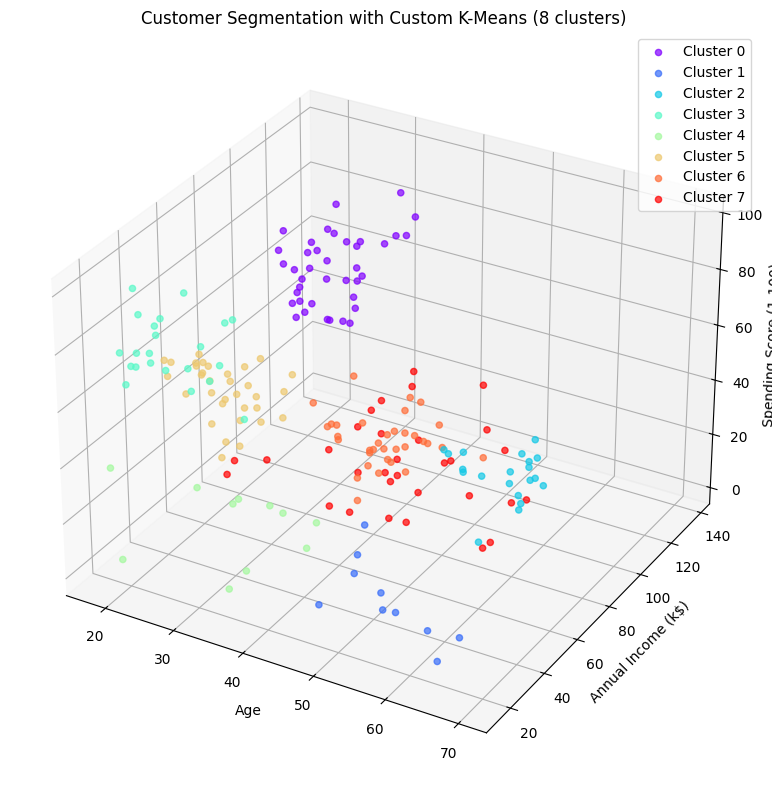

In [ ]:
# применим кластеризацию для Age, Annual Income, Spending Score
features = scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Инициализация и обучение модели
kmeans = CustomKMeans(n_clusters=8, max_iters=1000)
kmeans.fit(features)

# Добавляем метки кластеров обратно в DataFrame
df['Custom_Cluster'] = kmeans.labels

# Визуализация результатов
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Радужная цветовая палитра для 8 кластеров
colors = plt.cm.rainbow(np.linspace(0, 1, 8))

for cluster in range(8):
    cluster_data = df[df['Custom_Cluster'] == cluster]
    ax.scatter(cluster_data['Age'],
              cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              color=colors[cluster],
              label=f'Cluster {cluster}',
              alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation with Custom K-Means (8 clusters)')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
def evaluate_clustering(X, labels, centroids):
    # Внутрикластерная дисперсия
    inertia = np.sum([np.sum((X[labels == i] - center) ** 2) for i, center in enumerate(centroids)])  # вычисляем внутрикластерную дисперсию

    # Силуэтный коэффициент
    silhouette = silhouette_score(X, labels)  # вычисляем силуэтный коэффициент

    print(f'Внутрикластерная дисперсия: {inertia:.2f}')
    print(f'Силуэтный коэффициент: {silhouette:.2f}')

    return inertia, silhouette

# Оценка результатов
evaluate_clustering(features, kmeans.labels, kmeans.centroids)
print()

Внутрикластерная дисперсия: 105.23
Силуэтный коэффициент: 0.43



после множества итераций качество кластеризации заметно улучшено

### 2 признака

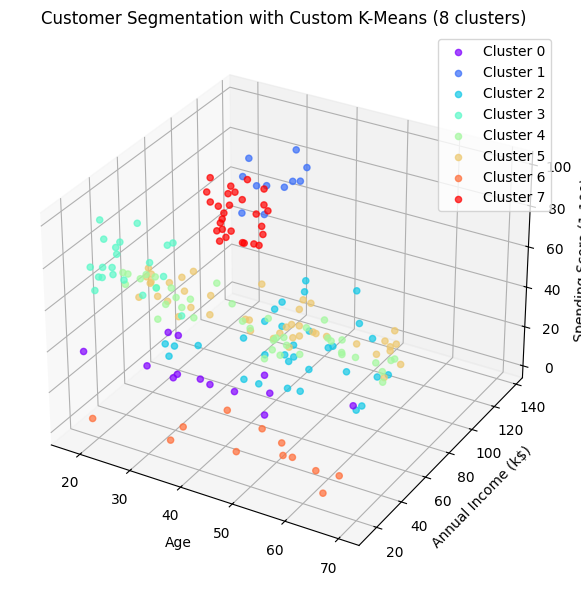

In [ ]:
# применим кластеризацию для Annual Income, Spending Score
features = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Инициализация и обучение модели
kmeans = CustomKMeans(n_clusters=8, max_iters=1000)
kmeans.fit(features)

# Добавляем метки кластеров обратно в DataFrame
df['Custom_Cluster'] = kmeans.labels

# Визуализация результатов
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Радужная цветовая палитра для 8 кластеров
colors = plt.cm.rainbow(np.linspace(0, 1, 8))

for cluster in range(8):
    cluster_data = df[df['Custom_Cluster'] == cluster]
    ax.scatter(cluster_data['Age'],
              cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              color=colors[cluster],
              label=f'Cluster {cluster}',
              alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation with Custom K-Means (8 clusters)')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
evaluate_clustering(features, kmeans.labels, kmeans.centroids)
print()

Внутрикластерная дисперсия: 52.02
Силуэтный коэффициент: 0.44



## DEC

In [ ]:
features = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

### autoencoder

In [ ]:
input_dim = features.shape[1]
encoding_dim = 2  # Размерность скрытого представления

# Архитектура автоэнкодера
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

In [ ]:
def dec_clusters_fit(features, autoencoder, n_clusters, epochs=100):
    autoencoder.fit(features, features, epochs=epochs, batch_size=32, shuffle=True, verbose=False)
    encoder_model = Model(inputs=input_layer, outputs=encoder)
    embedded_data = encoder_model.predict(features)
    dec_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dec_clusters = dec_kmeans.fit_predict(embedded_data)
    return dec_clusters, embedded_data

### Сравнение с K-means (2 признака)

In [ ]:
df['DEC_Cluster'], embedded_data = dec_clusters_fit(features, autoencoder, 8)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


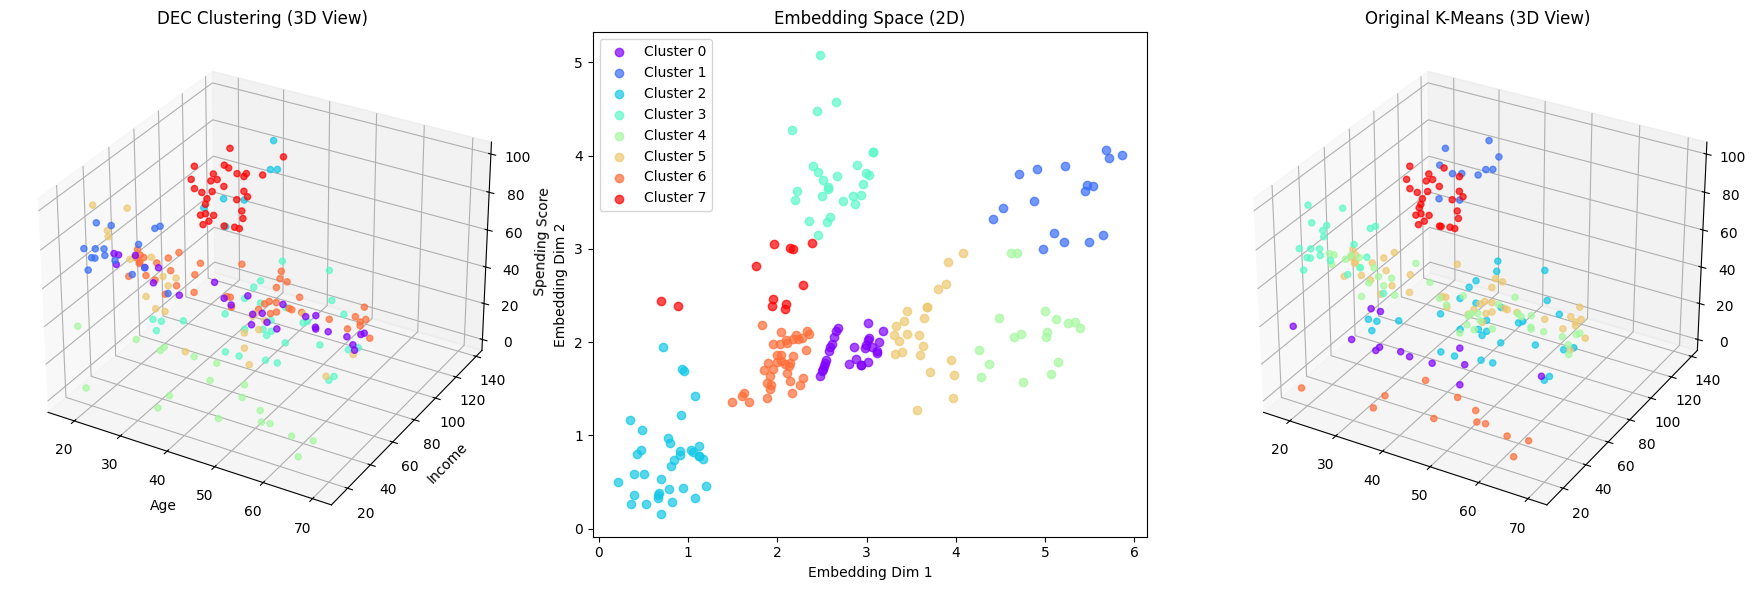

In [ ]:
fig = plt.figure(figsize=(18, 6))

# 3D plot исходных данных с DEC-кластерами
ax1 = fig.add_subplot(131, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 8))
for cluster in range(8):
    cluster_data = df[df['DEC_Cluster'] == cluster]
    ax1.scatter(cluster_data['Age'],
               cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               color=colors[cluster],
               label=f'Cluster {cluster}',
               alpha=0.7)
ax1.set_title('DEC Clustering (3D View)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_zlabel('Spending Score')

# 2D plot embedding пространства
ax2 = fig.add_subplot(132)
for cluster in range(8):
    cluster_mask = (dec_clusters == cluster)
    ax2.scatter(embedded_data[cluster_mask, 0],
               embedded_data[cluster_mask, 1],
               color=colors[cluster],
               label=f'Cluster {cluster}',
               alpha=0.7)
ax2.set_title('Embedding Space (2D)')
ax2.set_xlabel('Embedding Dim 1')
ax2.set_ylabel('Embedding Dim 2')
ax2.legend()

# Сравнение с обычным K-Means
ax3 = fig.add_subplot(133, projection='3d')
for cluster in range(8):
    cluster_data = df[df['Custom_Cluster'] == cluster]
    ax3.scatter(cluster_data['Age'],
               cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               color=colors[cluster],
               label=f'Cluster {cluster}',
               alpha=0.7)
ax3.set_title('Original K-Means (3D View)')

plt.tight_layout()
plt.show()

In [ ]:
print(f"K-Means Silhouette Score: {silhouette_score(features, df['Custom_Cluster']):.3f}")
print(f"DEC Silhouette Score: {silhouette_score(embedded_data, df['DEC_Cluster']):.3f}")

K-Means Silhouette Score: 0.452
DEC Silhouette Score: 0.485


### Метрики

In [ ]:
# Выбираем фичи для оценки (те же, что использовались в DEC)
X = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Метрики для DEC
dec_silhouette = silhouette_score(embedded_data, df['DEC_Cluster'])
dec_ch = calinski_harabasz_score(embedded_data, df['DEC_Cluster'])
dec_db = davies_bouldin_score(embedded_data, df['DEC_Cluster'])

# Метрики для K-Means
km_silhouette = silhouette_score(X, df['Custom_Cluster'])
km_ch = calinski_harabasz_score(X, df['Custom_Cluster'])
km_db = davies_bouldin_score(X, df['Custom_Cluster'])

print(f"""
DEC Metrics:
- Silhouette: {dec_silhouette:.3f} (чем ближе к 1, тем лучше)
- Calinski-Harabasz: {dec_ch:.1f} (чем выше, тем лучше)
- Davies-Bouldin: {dec_db:.3f} (чем ближе к 0, тем лучше)

K-Means Metrics:
- Silhouette: {km_silhouette:.3f}
- Calinski-Harabasz: {km_ch:.1f}
- Davies-Bouldin: {km_db:.3f}
""")


DEC Metrics:
- Silhouette: 0.485 (чем ближе к 1, тем лучше)
- Calinski-Harabasz: 397.9 (чем выше, тем лучше)
- Davies-Bouldin: 0.667 (чем ближе к 0, тем лучше)

K-Means Metrics:
- Silhouette: 0.452
- Calinski-Harabasz: 233.6
- Davies-Bouldin: 0.736

